### 客户细分的需要。  
客户的行为、人口统计学、地理等方面的差异有助于将他们归入不同的群体。学习客户中的不同群体有助于以下方面。   

1. 目标营销    
2. 客户理解
3. 最佳的产品放置
4. 寻找新客户
5. 收入增长   


### 频繁-频率-货币（RFM）模型来确定客户价值。   

在只有客户交易数据的零售业客户细分中，RFM模型是相当有用的模型。RFM代表了三个方面。

 - *近期* - 客户最近购买了多少次？
 - 频率* - 他们购买的频率是多少？
 - 货币价值* - 他们花了多少钱？   
 

这三个属性的组合可以被定义为给客户分配一个量化的价值。例如，一个最近购买了高价值产品并且经常交易的客户是一个高价值客户。

### 1. data_process:    

In [1]:
#Load all the required packages
import pandas as pd
import numpy as np
import datetime
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
import pandas as pd
# 读取数据
df = pd.read_csv('../data1.csv',encoding='utf-8')
df_ = df.copy()
df_.head()

,platform_open_id,goods_num,price,is_member,discount_fee,outer_id,take_at,status,payment,member_id,order_payment,total_fee,goods_id
0,101ZX1xyfG/omvnxQPYI8YPFhoi2hfl26RoAPgzb9VqwG0=,1,3650.0,0,300.0,302945-01,2020-01-01 01:35:43,6,3350.0,0,3350.0,3350.0,520399672992
1,爱012Pr5yntLUcTKU0MtsjPGOs2DEMds1FAQI7fgfrP3PMg=,1,2690.0,0,600.0,227605-01,2020-01-01 08:55:17,6,2090.0,0,2090.0,2090.0,548452717637
2,朱01i4Rmip4x6V5VS/UZPBzc+Nnn6lnZ7cacExIx+8aylCY=,1,3990.0,1,400.0,226403-01,2020-01-01 09:48:35,6,3590.0,616297,3590.0,3590.0,564779472639
3,001bRbDk61o6cYW1XuaH8XgLgKHM0CMIQafAKaTQc17qGM=,1,3290.0,0,0.0,NaN,2020-01-01 09:56:04,6,3290.0,0,3290.0,3290.0,609664493135
4,t014Au7WHWPPI0OeT5DX13SQ5q8qGekDqre2uZnHtcQpY8=,1,3590.0,1,500.0,282846-01,2020-01-01 10:36:50,6,3090.0,220404,3090.0,3090.0,589083659427


In [3]:
df_ = df_[['platform_open_id','status','payment','take_at']]
df_=df_[df_['status']==6]
df_=df_[df_['payment']>10]
df_['Invoice']= df_.index
date1 = df_['take_at'].str.split(' ').str[0]
time_1 = date1.str.split('-').str[0]+date1.str.split('-').str[1]+date1.str.split('-').str[2]
df_['year-month-day'] = time_1
df_.dropna(inplace=True)

df_.rename(columns={'platform_open_id':'Customer ID', 'payment': 'Sales','take_at':'InvoiceDate'}, inplace=True)
df_ = df_[['Invoice','Customer ID','InvoiceDate','Sales']]
# ### 更改用户ID类型
df_['Customer ID'] = df_['Customer ID'].astype('object')
df_['Invoice'] = df_['Invoice'].astype('object')
df_['InvoiceDate']=pd.to_datetime(df_['InvoiceDate'])
df_

,Invoice,Customer ID,InvoiceDate,Sales
0,0,101ZX1xyfG/omvnxQPYI8YPFhoi2hfl26RoAPgzb9VqwG0=,2020-01-01 01:35:43,3350.0
1,1,爱012Pr5yntLUcTKU0MtsjPGOs2DEMds1FAQI7fgfrP3PMg=,2020-01-01 08:55:17,2090.0
2,2,朱01i4Rmip4x6V5VS/UZPBzc+Nnn6lnZ7cacExIx+8aylCY=,2020-01-01 09:48:35,3590.0
3,3,001bRbDk61o6cYW1XuaH8XgLgKHM0CMIQafAKaTQc17qGM=,2020-01-01 09:56:04,3290.0
4,4,t014Au7WHWPPI0OeT5DX13SQ5q8qGekDqre2uZnHtcQpY8=,2020-01-01 10:36:50,3090.0
...,...,...,...,...
2076736,2076736,n01InRhxxuOhWe4BzurCg5ladnn6lnZ7cacExIx+8aylCY=,2021-06-26 11:02:07,100.0
2076739,2076739,p014nKE7F9VesBvrOcH9wtHE2dHwSigfMMQPj0dkBAC8Vk=,2021-06-26 23:59:02,2990.0
2076745,2076745,丹012kb+XmIwcJ9PSqOBWY8vwtnn6lnZ7cacExIx+8aylCY=,2021-06-28 18:43:34,3790.0
2076747,2076747,y0185UIrrcxFSaqgoR0BIGAJgKHM0CMIQafAKaTQc17qGM=,2021-06-29 08:40:37,2990.0


In [4]:
import datetime as dt
NOW = dt.datetime(2021,7,2)
rfmTable = df_.groupby('Customer ID').agg({'InvoiceDate': lambda x: (NOW - x.max()).days, # Recency
                                        'Invoice': lambda x: len(x),      # Frequency
                                        'Sales': lambda x: x.sum()}) # Monetary Value

rfmTable.head()

,InvoiceDate,Invoice,Sales
Customer ID,,,
-01CXQpmEM5354W1E9Y5jysHWdHwSigfMMQPj0dkBAC8Vk=,483,1,2990.0
-01ImFkgFq2wilGM2aDBAs09g==,235,1,300.0
.019lblZS71SIXRrbKbX8gH0c16em85Fa0GBxDkCy7kcI8=,240,1,3990.0
.01MPyjo2BxsrZa0sIQyVnAOM2DEMds1FAQI7fgfrP3PMg=,247,2,6180.0
001+0c99ohoK2zGa6v1PyAVrM2DEMds1FAQI7fgfrP3PMg=,509,1,5290.0


In [5]:
rfmTable.rename(columns={'InvoiceDate': 'recency', 
                         'Invoice': 'frequency', 
                          'Sales': 'monetary_value'}, inplace=True)
rfmTable.head()

,recency,frequency,monetary_value
Customer ID,,,
-01CXQpmEM5354W1E9Y5jysHWdHwSigfMMQPj0dkBAC8Vk=,483,1,2990.0
-01ImFkgFq2wilGM2aDBAs09g==,235,1,300.0
.019lblZS71SIXRrbKbX8gH0c16em85Fa0GBxDkCy7kcI8=,240,1,3990.0
.01MPyjo2BxsrZa0sIQyVnAOM2DEMds1FAQI7fgfrP3PMg=,247,2,6180.0
001+0c99ohoK2zGa6v1PyAVrM2DEMds1FAQI7fgfrP3PMg=,509,1,5290.0


In [6]:
rfmTable.describe()

,recency,frequency,monetary_value
count,953143.000000,953143.000000,953143.000000
mean,250.294822,1.125779,3373.091358
std,149.786337,0.471439,2043.859917
min,1.000000,1.000000,49.160000
25%,131.000000,1.000000,2590.000000
50%,242.000000,1.000000,2990.000000
75%,380.000000,1.000000,3650.000000
max,547.000000,130.000000,267580.000000


In [7]:
# Create labels for Recency and Frequency
# r_labels = range(2, -1,-1)
# # Assign these labels to 2 equal percentile groups 
# r_groups = pd.qcut(rfmTable['recency'], q=3, labels=r_labels)
# m_labels = range(0, 3)
# # Assign these labels to three equal percentile groups 
# m_groups = pd.qcut(rfmTable['monetary_value'], q=3, labels=m_labels)
# # Create new columns R M 
# rfmTable = rfmTable.assign(R = r_groups.values,M = m_groups.values)
# Create new columns F
def f_class(df):
    if df["frequency"]<=1:
        return 0
    elif 1<df["frequency"]<=3:
        return 1
    elif 3<df["frequency"]<=5:
        return 2
    else:
        return 3
    
def m_class(df):
    if df["monetary_value"]<=2590:
        return 0
    elif 2590<df["monetary_value"]<=3650:
        return 1
    else:
        return 2
    
def r_class(df):
    if df["recency"]<=130:
        return 2
    elif 130<df["recency"]<=242:
        return 1
    else:
        return 0
rfmTable["F"] = rfmTable.apply(f_class, axis=1)
rfmTable["M"] = rfmTable.apply(m_class, axis=1)
rfmTable["R"] = rfmTable.apply(r_class, axis=1)
rfmTable.head()

,recency,frequency,monetary_value,F,M,R
Customer ID,,,,,,
-01CXQpmEM5354W1E9Y5jysHWdHwSigfMMQPj0dkBAC8Vk=,483,1,2990.0,0,1,0
-01ImFkgFq2wilGM2aDBAs09g==,235,1,300.0,0,0,1
.019lblZS71SIXRrbKbX8gH0c16em85Fa0GBxDkCy7kcI8=,240,1,3990.0,0,2,1
.01MPyjo2BxsrZa0sIQyVnAOM2DEMds1FAQI7fgfrP3PMg=,247,2,6180.0,1,2,0
001+0c99ohoK2zGa6v1PyAVrM2DEMds1FAQI7fgfrP3PMg=,509,1,5290.0,0,2,0


In [8]:
rfmTable['RFM_Score'] = rfmTable[['R','F','M']].sum(axis=1)
RFM_ = rfmTable.groupby('RFM_Score')['RFM_Score'].count()
print(RFM_)
rfmTable.head()

RFM_Score
0    103321
1    324700
2    250107
3    177970
4     68604
5     26499
6      1617
7       325
Name: RFM_Score, dtype: int64


,recency,frequency,monetary_value,F,M,R,RFM_Score
Customer ID,,,,,,,
-01CXQpmEM5354W1E9Y5jysHWdHwSigfMMQPj0dkBAC8Vk=,483,1,2990.0,0,1,0,1
-01ImFkgFq2wilGM2aDBAs09g==,235,1,300.0,0,0,1,1
.019lblZS71SIXRrbKbX8gH0c16em85Fa0GBxDkCy7kcI8=,240,1,3990.0,0,2,1,3
.01MPyjo2BxsrZa0sIQyVnAOM2DEMds1FAQI7fgfrP3PMg=,247,2,6180.0,1,2,0,3
001+0c99ohoK2zGa6v1PyAVrM2DEMds1FAQI7fgfrP3PMg=,509,1,5290.0,0,2,0,2


In [21]:
# Calculate average values for each Customer Segment, and return a size of each segment 
rfm_level_agg = rfmTable.groupby('RFM_Score').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': ['mean', 'count'],
}).round(1)
rfm_level_ag = pd.DataFrame(rfm_level_agg)
rfm_level_ag = rfm_level_ag.reset_index()
rfm_level_ag

# 0	276.9	1.0	2245.8	237109
# 1	266.7	2.0	6234.1	60474
# 2	221.1	1.1	294.9	21890
# 3	26.7	1.0	3044.8	106800
# 4	376.0	1.0	3540.6	331897
# 5	212.1	3.6	12415.2	13191
# 6	128.4	1.0	3216.2	163397
# 7	28.7	2.2	5955.7	18385

RFM_Score recency frequency monetary_value        
               mean      mean           mean   count
0         0   354.7       1.0         1851.5  103321
1         1   335.2       1.0         2772.9  324700
2         2   236.7       1.0         3249.1  250107
3         3   135.5       1.2         3941.7  177970
4         4   115.7       1.5         5510.0   68604
5         5    64.9       2.3         7461.7   26499
6         6    71.2       4.7        15527.8    1617
7         7    53.4       8.1        25852.2     325

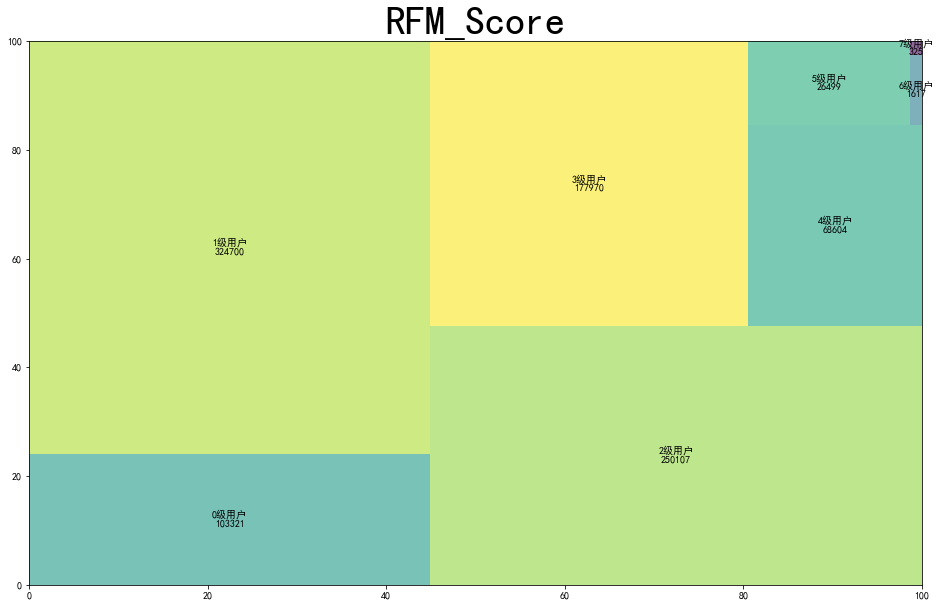

In [97]:
import squarify
import matplotlib as mpl
mpl.rcParams["font.sans-serif"] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"] = False

#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 10)
squarify.plot(sizes=rfm_level_agg['RFM_Score'], 
              label=['0级用户',
                     '1级用户',
                     '2级用户',
                     '3级用户',
                     '4级用户',
                     '5级用户',
                     '6级用户',
                    '7级用户'], alpha=.6 ,value=rfm_level_agg['RFM_Score'])
plt.title("RFM_Score",fontsize=40,fontweight="bold")
plt.axis('on')
plt.show()

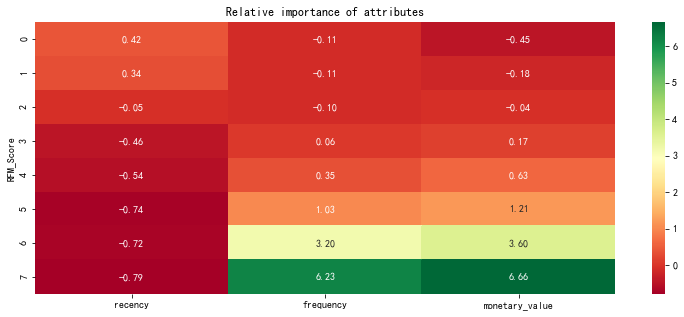

In [104]:

cluster_avg1 = rfmTable[['recency', 'frequency', 'monetary_value','RFM_Score']].groupby(['RFM_Score']).mean() 
population_avg1 = data_rfm.mean()
relative_imp1 = cluster_avg1 / population_avg1 - 1
relative_imp1.round(3)
plt.figure(figsize=(13, 5))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp1, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

In [95]:
print((NOW - dt.datetime(2020,3,5)).days==484)
df_[df_['Customer ID']=='-01CXQpmEM5354W1E9Y5jysHWdHwSigfMMQPj0dkBAC8Vk=']

True


,Invoice,Customer ID,InvoiceDate,Sales
325621,325621,-01CXQpmEM5354W1E9Y5jysHWdHwSigfMMQPj0dkBAC8Vk=,2020-03-05 00:00:50,2990.0


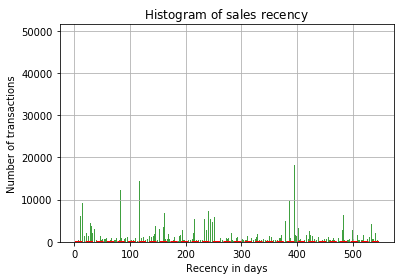

In [10]:
from scipy.stats import norm
import seaborn as sns
mu = np.mean(rfmTable.recency)
sigma = math.sqrt(np.var(rfmTable.recency))
n, bins, patches = plt.hist(rfmTable.recency, 1000, facecolor='green', alpha=0.75)
y = norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)
plt.xlabel('Recency in days')
plt.ylabel('Number of transactions')
plt.title(r'$\mathrm{Histogram\ of\ sales\ recency}\ $')
plt.grid(True)

### 2. Feature Scaling:    
由于所有的特征，如经常性、频率和货币价值都在不同的数值范围内，我们需要对它们进行标准化。此外，像*"货币价值 "*这样的特征可以有很大的取值范围。因此，为了使所有的输入特征标准化，我们应用了对数变换，这样，我们的聚类算法的输入就是一组经过缩放和变换的特征。

In [11]:
#Applying log transformations
dfCustomerHistory = rfmTable.copy()
dfCustomerHistory['log_Recency'] = dfCustomerHistory["recency"].apply(math.log)
dfCustomerHistory['log_Frequency'] = dfCustomerHistory["frequency"].apply(math.log)
dfCustomerHistory['log_MonetaryValue'] = dfCustomerHistory["monetary_value"].apply(math.log)

#Preparing matrix for standard scaling transformation
X = dfCustomerHistory[["log_Recency", "log_Frequency", "log_MonetaryValue"]].values
#Standardize the features (mean 0 and std. dev 1)
print(X[:3,:])
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
print(X_scaled[:3,:])
print(scaler.inverse_transform(X_scaled)[:3,:])

[[6.18001665 0.         8.00302867]
 [5.45958551 0.         5.70378247]
 [5.48063892 0.         8.29154651]]
[[ 1.00527582 -0.31890292  0.01004033]
 [ 0.25781717 -0.31890292 -4.21869871]
 [ 0.27966041 -0.31890292  0.54067802]]
[[6.18001665 0.         8.00302867]
 [5.45958551 0.         5.70378247]
 [5.48063892 0.         8.29154651]]


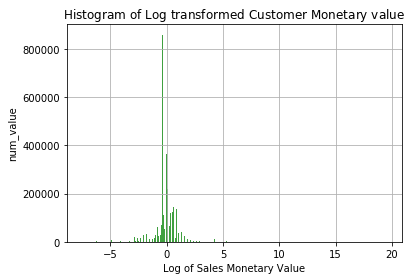

In [12]:
n, bins, patches = plt.hist(X_scaled, 100, facecolor='green', alpha=0.75)
plt.xlabel('Log of Sales Monetary Value')
plt.ylabel('num_value')
plt.title(r'$\mathrm{Histogram\ of\ Log\ transformed\ Customer\ Monetary\ value}\ $')
plt.grid(True)
plt.show()

### 6. Visualizing the relationship between R, F and M:

Text(0.5, 0, 'MonetaryValue')

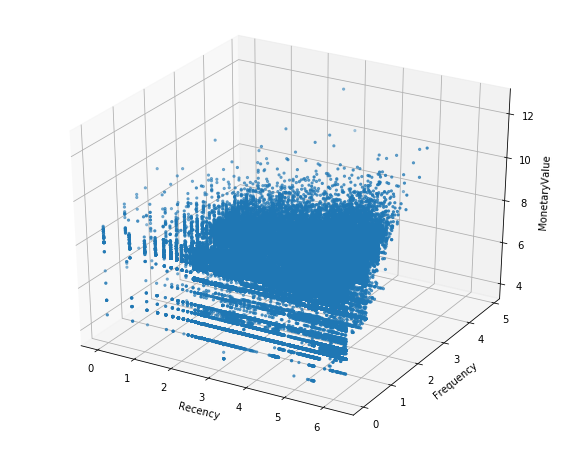

In [13]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

xs =dfCustomerHistory.log_Recency
ys = dfCustomerHistory.log_Frequency
zs = dfCustomerHistory.log_MonetaryValue
ax.scatter(xs, ys, zs, s=5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('MonetaryValue')

In [102]:
data_rfm = rfmTable[['recency', 'frequency', 'monetary_value']]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, random_state=1) 
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_
data_rfm_k5 = data_rfm.assign(Cluster=cluster_labels)
grouped = data_rfm_k5.groupby(['Cluster'])
grouped.agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': ['mean', 'count']
  }).round(1)

recency frequency monetary_value        
           mean      mean           mean   count
Cluster                                         
0         276.9       1.0         2245.8  237109
1         266.7       2.0         6234.1   60474
2         221.1       1.1          294.9   21890
3          26.7       1.0         3044.8  106800
4         376.0       1.0         3540.6  331897
5         212.1       3.6        12415.2   13191
6         128.4       1.0         3216.2  163397
7          28.7       2.2         5955.7   18385

In [39]:
data_melt = pd.melt(
                    data_rfm_k5.reset_index(),               
                    id_vars=['Customer ID', 'Cluster'],
                    value_vars=['recency', 'frequency', 'monetary_value'], 
                    var_name='Metric', value_name='Value'
                    )
data_melt

,Customer ID,Cluster,Metric,Value
0,-01CXQpmEM5354W1E9Y5jysHWdHwSigfMMQPj0dkBAC8Vk=,4,recency,483.0
1,-01ImFkgFq2wilGM2aDBAs09g==,2,recency,235.0
2,.019lblZS71SIXRrbKbX8gH0c16em85Fa0GBxDkCy7kcI8=,4,recency,240.0
3,.01MPyjo2BxsrZa0sIQyVnAOM2DEMds1FAQI7fgfrP3PMg=,1,recency,247.0
4,001+0c99ohoK2zGa6v1PyAVrM2DEMds1FAQI7fgfrP3PMg=,4,recency,509.0
...,...,...,...,...
2859424,～01wc11OQ6eLIP6cmfe7quljtnn6lnZ7cacExIx+8aylCY=,6,monetary_value,4980.0
2859425,～01ziO+DdjUEZvte+dfd7p/ka3Y2wWCx2gxb9BRyrBfqBc=,6,monetary_value,2990.0
2859426,￠011yPrqbxfQ5eS4/fkLMMqM7Givcw3Am+3moAxzg1PqUY=,0,monetary_value,2690.0
2859427,￡01QGTvnliA3u51oVl8ejdWTK3Y2wWCx2gxb9BRyrBfqBc=,4,monetary_value,3490.0


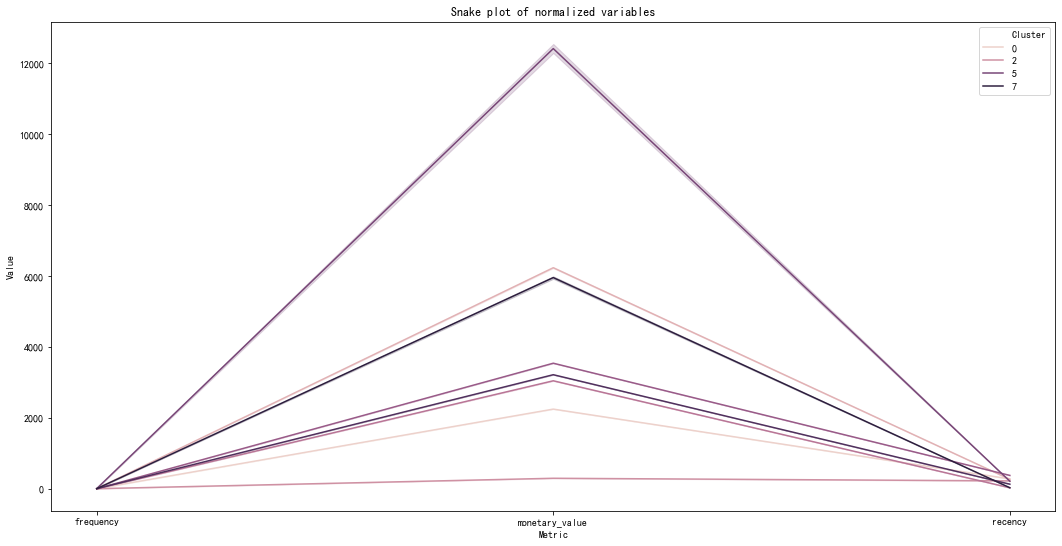

In [44]:
plt.figure(figsize = (18,9))
plt.title('Snake plot of normalized variables')
plt.xlabel('Metric')
plt.ylabel('Value')
sns.lineplot(data=data_melt, x='Metric', y='Value', hue='Cluster')
plt.show()

In [110]:
cluster_avg = data_rfm_k5.groupby(['Cluster']).mean() 
population_avg = data_rfm.mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp['RFM_Score'] = relative_imp[['recency','frequency','monetary_value']].sum(axis=1)
relative_imp.sort_values("RFM_Score",inplace=True)
relative_imp.pop("RFM_Score")
relative_imp.round(2)

,recency,frequency,monetary_value
Cluster,,,
3,-0.89,-0.11,-0.10
2,-0.12,0.00,-0.91
6,-0.49,-0.11,-0.05
0,0.11,-0.11,-0.33
4,0.50,-0.11,0.05
7,-0.89,0.93,0.77
1,0.07,0.79,0.85
5,-0.15,2.18,2.68


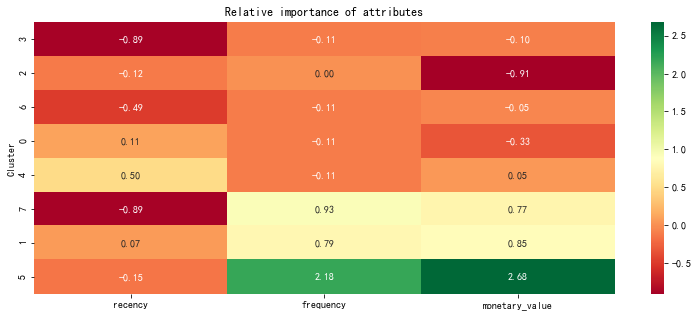

In [111]:
plt.figure(figsize=(13, 5))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

(953143, 3)
Birch(branching_factor=300, compute_labels=True, copy=True, n_clusters=8,
      threshold=0.4)


Text(0.5, 1.0, 'Actual')

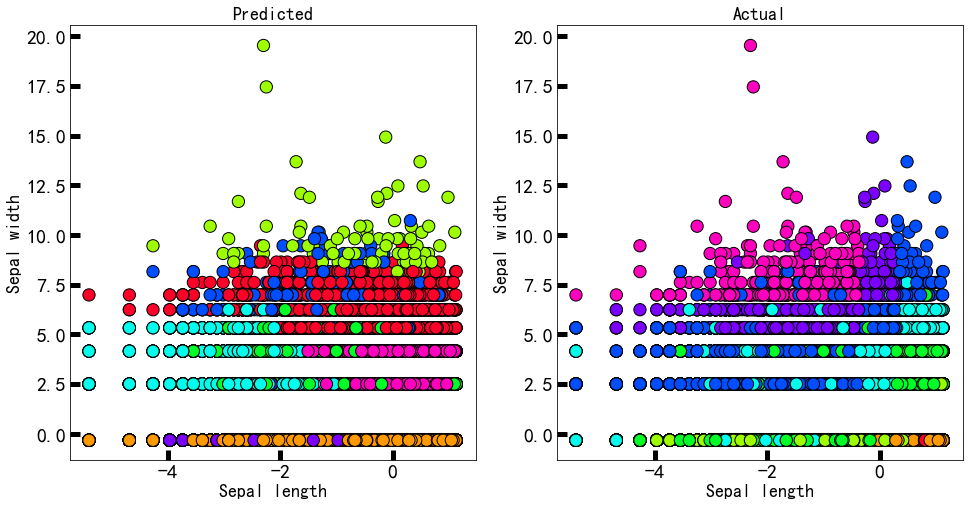

In [72]:
print(X_scaled.shape)
from sklearn.cluster import Birch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
bclust=Birch(branching_factor=300,  n_clusters=8,threshold=.4).fit(X_scaled)
print(bclust)
labels = bclust.predict(X_scaled)
# gmm = GaussianMixture(n_components = 8)
# gmm.fit(X_scaled)
# labels = gmm.predict(X_scaled)

# kmeans = KMeans(n_clusters=8, init='k-means++',max_iter=3000)
# kmeans.fit(X_scaled)
# print(kmeans)
# labels = kmeans.labels_

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1],c=labels, cmap='gist_rainbow', edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Predicted', fontsize=18)

axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=rfmTable.RFM_Score, cmap='gist_rainbow', edgecolor='k', s=150)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].set_title('Actual', fontsize=18)

In [50]:
# 如果使用k-means，可以通过看各个类别的中心点，从而可以中心点根据规则最后的标签
# np.exp(scaler.inverse_transform(kmeans.cluster_centers_))

In [73]:
print(bclust.subcluster_labels_)
np.exp(scaler.inverse_transform(bclust.subcluster_centers_))

[1 6 1 7 1 1 1 1 1 1 3 1 1 1 1 4 4 1 0 7 7 7 3 0 6 7 3 6 4 1 7 6 7 6 5 7 1
 1 1 6 6 6 0 7 4 6 3 1 1 4 1 4 1 6 1 7 4 4 4 0 3 3 0 5 7 7 6 4 7 3 4 7 6 4
 3 4 7 4 6 7 1 0 6 1 3 3 1 0 7 7 4 3 3 4 1 1 4 4 3 3 1 5 7 3 3 4 1 3 3 1 3
 6 5 6 4 7 4 6 5 6 4 1 6 3 4 5 3 0 3 6 7 6 7 0 6 3 6 0 0 6 3 1 3 0 3 0 4 3
 0 7 4 3 0 3 3 6 4 7 3 4 6 3 0 4 0 3 0 5 4 3 1 3 3 4 3 5 1 3 0 0 7 5 7 6 5
 3 3 4 1 3 6 4 1 0 6 1 0 3 1 3 3 3 6 6 0 6 5 4 4 4 4 7 6 6 1 5 0 0 4 5 3 3
 0 6 3 7 5 5 5 3 3 3 3 3 5 1 0 5 5 1 6 0 5 5 1 1 6 4 3 0 1 4 3 1 1 1 1 3 3
 3 3 3 1 6 1 1 1 6 6 1 1 6 6 6 6 1 6 1 6 6 2 2 5 2 2 2 2 2 5 2 2 2 2 2 0 2
 5 2 2 2 2 2 0 0 5 5 0 0 5 0 0 0 0 0 4 0 0 0 0 5 0 0 0 5 0 5 2 0 0 2 5 0 0
 0 0 0 0 0 4 0 4 5 5 0 0 0 0 0 0 5 0 5 4 0 0 4 0 0 4 0 0 5 2 0 5 4 2 5 0 4
 7 0 5 0 0 5 0 2 0 5 5 7 7 0 5 4 0 4 5 0 0 5 0 0 7 0 3 5 0 7 2 5 5 2 0 0 5
 4 0 5 4 5 3 0 0 7 0 0 4 4 4 2 5 0 0 4 5 5 2 4 3 2 0 2 4 3 4 2 5 5 0 0 2 5
 4 0 4 5 0 2 3 5 0 0 2 0 0 0 0 0 0 0 2 2 5 0 0 0 5 0 0 5 0 2 0 0 0 5 0 0 0
 5 0 0 5 0 0 0 0 2 0 0 0 

array([[4.16895866e+02, 1.00000000e+00, 2.85697360e+03],
       [4.09081272e+02, 1.00000000e+00, 2.93025255e+02],
       [2.29718052e+02, 1.00000000e+00, 3.66791177e+03],
       ...,
       [2.40000000e+01, 2.00000000e+00, 6.50000000e+02],
       [4.70000000e+01, 1.00000000e+00, 3.88700000e+04],
       [7.80000000e+01, 1.00000000e+00, 2.49000000e+04]])

In [74]:
import collections
count=collections.Counter(list(labels))
print(count)
# 0    103321
# 1    324700
# 2    250107
# 3    177970
# 4     68604
# 5     26499
# 6      1617
# 7       325

Counter({1: 837842, 7: 60325, 6: 20925, 3: 15467, 4: 14767, 0: 3271, 5: 438, 2: 108})


In [75]:
print(labels[-10:])
print(np.array(list(rfmTable.RFM_Score))[-10:])

[7 1 7 1 1 1 1 1 1 1]
[3 3 4 2 1 4 3 1 1 1]


In [76]:
from sklearn.metrics import accuracy_score
score = accuracy_score(np.array(list(rfmTable.RFM_Score)),labels)
score

0.3401472811529854